In [1]:
# Titanic dataset (introduction to ML)
# in this project, we use the common used Titanic dataset  
# to identify those who survived
# In this notebook, we try to identify and analyze the different parameters

In [2]:
import numpy as np
import pandas as pd
from collections import Counter
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import tabulate

In [3]:
# data informations : (source: https://www.kaggle.com/c/titanic/data)

# survived: 0 -> No, 1 -> yes
# Pclass: 1 -> 1st class, and ...
# SibSp: Nb of siblings / spouses aboard
# Parch: Nb of parents / children aboard
 

In [4]:
matplotlib.rcParams['figure.figsize'] = [10, 5]
plt.style.use('fivethirtyeight')

In [5]:
data_train = pd.read_csv('./Dataset/train.csv')
data_test = pd.read_csv('./Dataset/test.csv')

In [6]:
data_train.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
# title recovery ?
# in this part, we count how many people have the same first element part in the name
names = data_train['Name'].to_list()
n1 = [n.split(',')[0] for n in names]
first_n = Counter(n1)
title_n = Counter(list(first_n.values()))
tab = [["Nb", "Iteration"]]
tab += [[k,v] for k, v in title_n.items()]
tabulate.tabulate(tab, tablefmt='html', headers='firstrow')

Nb,Iteration
2,83
1,534
3,28
4,14
6,5
9,1
5,1
7,1


In [8]:
# we count how many people have the same 'title', exp: 'Mr', 'Mrs', 'Miss'
n2 = [n.split(',')[1].split('.')[0] for n in names]
tab = [['Title', 'Nb']]
tab += [[k,v] for k, v in Counter(n2).items()]
tabulate.tabulate(tab, tablefmt='html', headers='firstrow')

Title,Nb
Mr,517
Mrs,125
Miss,182
Master,40
Don,1
Rev,6
Dr,7
Mme,1
Ms,1
Major,2


In [9]:
# creation of groups: we create two groups of people, the first with common 'titles', group 0
# the second with less common titles, group 1
# the assumption is that the group 1 has not the same probability to survive as the group 0
group_0 = ['Mr', 'Mrs', 'Miss', 'Mme', 'Ms', 'Mlle']
group_1 = ['Don', 'Rev', 'Dr', 'Major', 'Lady', 'Sir', 'Col', 'Capt']

In [10]:
# Here, we prepare some useful functions
# function to transform the first part of the name
def transform_first(x):
    fst = x.split(',')[0]
    return first_n[fst]

# function to transform the title 
def transform_title(x):
    group_0 = ['Mr', 'Mrs', 'Miss', 'Mme', 'Ms', 'Mlle']
    group_1 = ['Don', 'Rev', 'Dr', 'Major', 'Lady', 'Sir', 'Col', 'Capt']
    title = x.split(',')[1]
    status = 2
    for t in group_0:
        if t in title:
            status = 0
    for t in group_1:
        if t in title:
            status = 1
    return status

In [11]:
# analyse du dataset
def analyse(df):
    attributs = [c for c in df.columns]  # name of columns
    val_range = {}
    for at in attributs:
        vals = np.unique(df[at].to_list())
        val_range[at] = vals
    return val_range   

In [12]:
# simple exploration, range of some values and check if there are nan 
# we control the dataset
vals = analyse(data_train)
infos = [['column', 'values', 'nan?']]
for at in vals.keys():
    v = vals[at]
    v = [1 if (np.nan == vi or 'nan'==vi) else 0 for vi in v]
    if at not in ["PassengerId", "Name", "Ticket", "Cabin", "Age", "Fare"]:
        infos += [[at, vals[at], np.sum(v)>0]]
    else:
        infos += [[at, '-', np.sum(v)>0]]
tabulate.tabulate(infos, tablefmt='html', headers='firstrow')

column,values,nan?
PassengerId,-,0
Survived,[0 1],0
Pclass,[1 2 3],0
Name,-,0
Sex,['female' 'male'],0
Age,-,0
SibSp,[0 1 2 3 4 5 8],0
Parch,[0 1 2 3 4 5 6],0
Ticket,-,0
Fare,-,0


In [13]:
# we define a first pipeline to transform the datatset 
def transform(df):
    attr_to_val = {}
    attr_to_val["Pclass"] = {"1fst":1, "2nd":2, "3rd":3}
    attr_to_val["hasCabin"] = {"no":0, "yes":1}
    df["hasCabin"] = np.where(pd.isnull(df['Cabin']), 0, 1)
    attr_to_val["Sex"] = {"male":0, "female":1}
    df["Sex"] = np.where(df["Sex"]=="male", 0, 1)
    attr_to_val["Embarked"] = {'C':0, 'Q':1, 'S':2, np.nan:3} 
    df["Embarked"] = df["Embarked"].map(attr_to_val["Embarked"], na_action=None)
    
    df["n1"] = df["Name"].apply(lambda x: transform_first(x))
    
    attr_to_val["n2"] = {'group 0': 0 , "group 1": 1, "ukn":2}
    df["n2"] = df["Name"].apply(lambda x: transform_title(x))
    
    mAge = df['Age'].mean()
    df['Age'] = df['Age'].fillna(mAge)
    return df, attr_to_val
    

In [14]:
data_train, attr_to_val = transform(data_train)

In [15]:
data_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,hasCabin,n1,n2
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,2,0,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,0,1,1,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,2,1,2,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,2,0,2,0


In [16]:
# Exploration: we try to explore some interesting point in the parameters and try to identify
# some relations with the probability to survice

In [17]:
# relation between age and survived
# 0) histogram of age 

<AxesSubplot:xlabel='Age', ylabel='Count'>

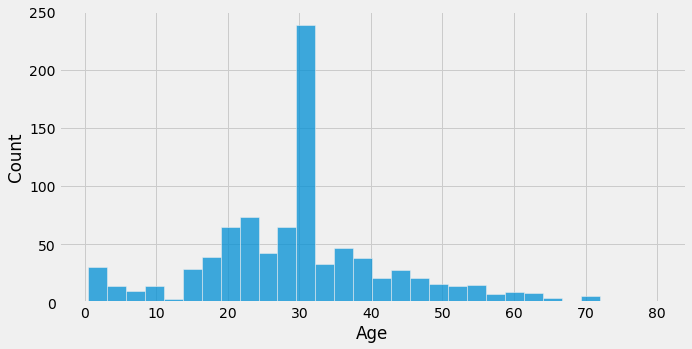

In [18]:
sns.histplot(data=data_train['Age'])

In [19]:
# we can observe the distribution of the population following their age
# an important part of the population are about 30 years old, 

In [20]:
hist_G,bins_G = np.histogram(data_train['Age'],bins = np.arange(0, 100, 10)) 

In [21]:
# we define a function to plot the histogram chart between a parameter in the dataset
# and the survival rate
def histogram_survived(df, column, bins, xticks=None):
    hist_G,bins_G = np.histogram(data_train[column],bins = bins) 
    hist_G = np.maximum(hist_G, 1)
    df_0 = df[[column, 'Survived']]
    df_0_S = df_0.loc[df_0['Survived']==1]
    survived = df_0_S[column].to_numpy()
    df_0_NS = df_0.loc[df_0['Survived']==0]
    no_survived = df_0_NS[column].to_numpy()

    hist_S, _ = np.histogram(survived, bins = bins)
    hist_NS, _ = np.histogram(no_survived, bins = bins)

    plt.subplot(121)
    width = 0.85*(bins_G[1] - bins_G[0]) * 0.5
    plt.bar(bins_G[:-1], np.divide(hist_NS, hist_G)*100.0, align='edge', width=width, label="No Survived", color='red')
    plt.bar(bins_G[:-1] + width, np.divide(hist_S, hist_G)*100.0, align='edge', width=width, label="Survived", color='blue')
    plt.title("survival rate/ {}".format(column))
    plt.xlabel(column)
    plt.ylabel("% survived")
    if xticks is not None:
        plt.xticks(xticks[0], xticks[1])
    plt.legend()
    plt.subplot(122)
    plt.bar(bins_G[:-1], hist_NS+hist_S, align='edge', width=width*2, label="Population")
    plt.xlabel(column)
    plt.ylabel("population")
    if xticks is not None:
        plt.xticks(xticks[0], xticks[1])

In [22]:
# reduction of the dataset
def reduction(df):
    return df[['Survived', 'Pclass', 'Sex','Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'hasCabin', 'n1', 'n2']]

In [23]:
# In the following, we try to detect some correlations between a parameter/attribute and the survival
# rate
# we plot the evolution of the survival rate forllowing this attribute
# and we count the number of people following this same parameter
# the purpose is to check if the data are balanced 

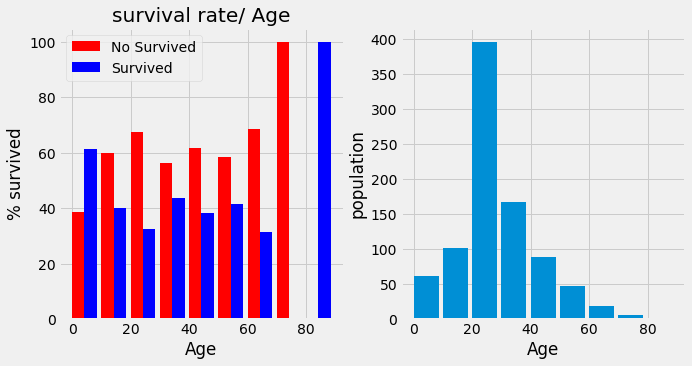

In [24]:
# survived = f(age) ? We check the correlation between the age and the survival rate
histogram_survived(data_train, "Age", np.arange(0, 100, 10))

In [25]:
# we can observe that the number of people is not balanced according to the age 
# except for the young people, the survival rate is lower than 50%

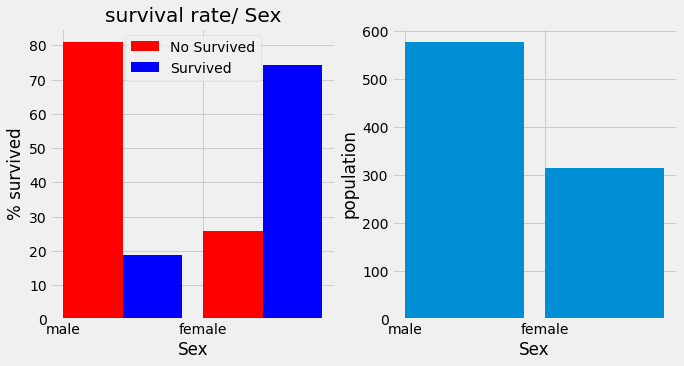

In [26]:
# survived = f(sex) ?:
histogram_survived(data_train, "Sex", bins=[0, 1, 2], 
                   xticks=(list(attr_to_val['Sex'].values()), 
                           list(attr_to_val['Sex'].keys())))

In [27]:
# The survival rate is very different according to male/female. 20% of men survived and over 
# than 70% of women survived. Therefore, the age is a very important parameter

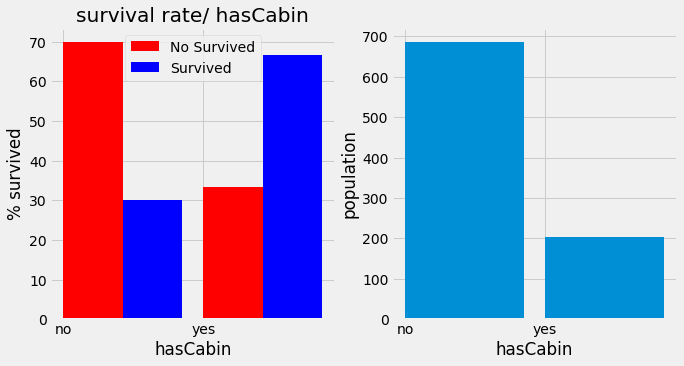

In [28]:
# survived = f(hasCabin) ?
histogram_survived(data_train, "hasCabin", bins=[0, 1, 2], 
                   xticks=(list(attr_to_val['hasCabin'].values()), 
                           list(attr_to_val['hasCabin'].keys())))

In [29]:
# 70% people with a cabin survived and only 30% without a cabin survived. We can observe that 
# only few had a cabin <30%

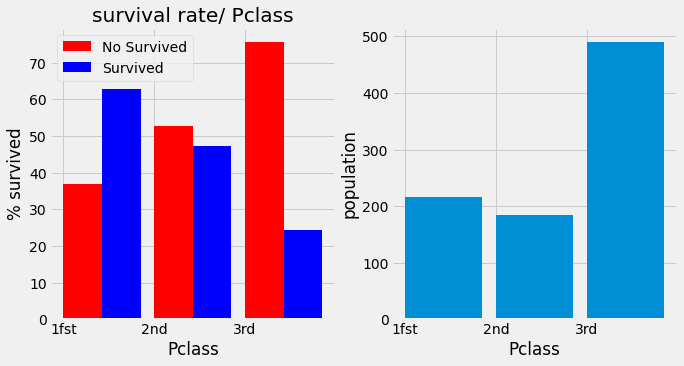

In [30]:
# survived = f(Pclass) ?
histogram_survived(data_train, "Pclass", bins=[1, 2, 3, 4], 
                   xticks=(list(attr_to_val['Pclass'].values()), 
                           list(attr_to_val['Pclass'].keys())))

In [31]:
# There is an important diference between first class and third class. We can suppose the
# same thing that with the cabin. 

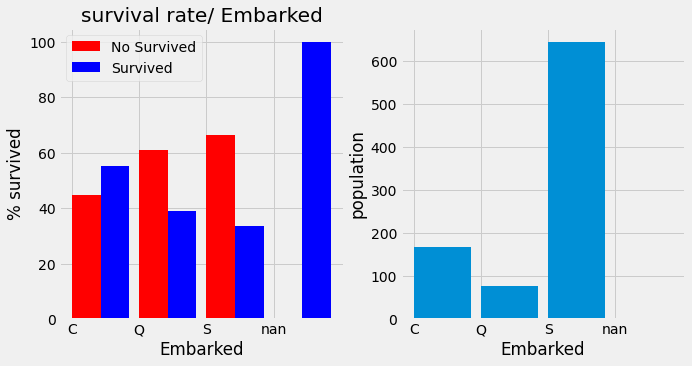

In [32]:
# survived = f(Embarked) ?
histogram_survived(data_train, "Embarked", bins=[0, 1, 2, 3, 4], 
                   xticks=(list(attr_to_val['Embarked'].values()), 
                           list(attr_to_val['Embarked'].keys())))

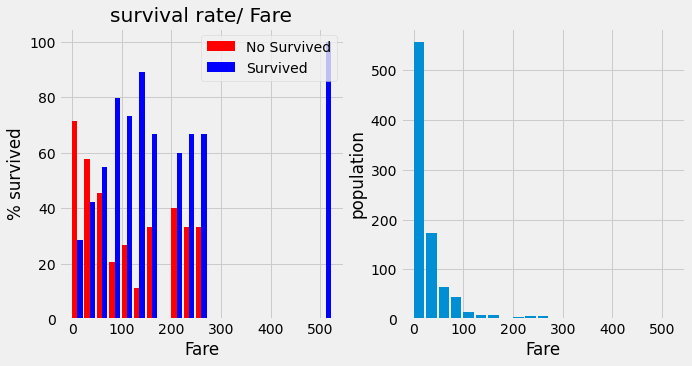

In [33]:
# survived = f(Fare) ?
histogram_survived(data_train, "Fare", bins=np.arange(data_train["Fare"].min(), data_train["Fare"].max()+25, 25))

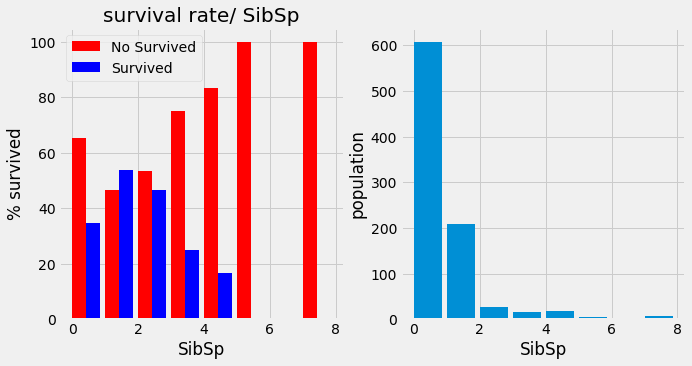

In [34]:
# survived = f(SibSp) ?
histogram_survived(data_train, "SibSp", bins=np.arange(data_train["SibSp"].min(), data_train["SibSp"].max()+1, 1))

In [35]:
# In that case, it is difficult to conclude something. For SibSp > 1, the population is insignigicant 
# and we can say nothing. It seems that for SibSp=0, 2/3 of the population did not survive, and 
# for SibSp = 1, the rate is close to 50% 

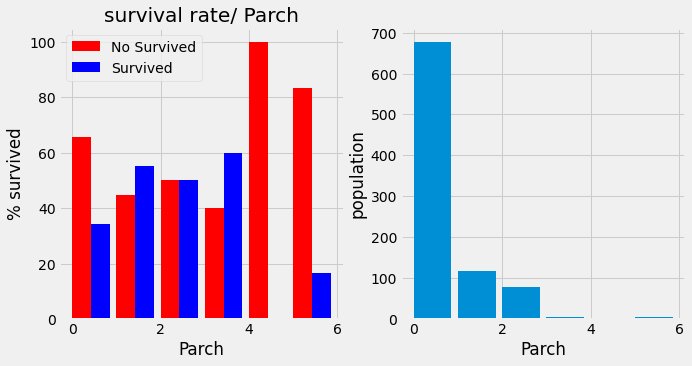

In [36]:
# survived = f(Parch) ?
histogram_survived(data_train, "Parch", bins=np.arange(data_train["Parch"].min(), data_train["Parch"].max()+1, 1))

In [37]:
# here, we can conclude nothing due to the unbalanced population

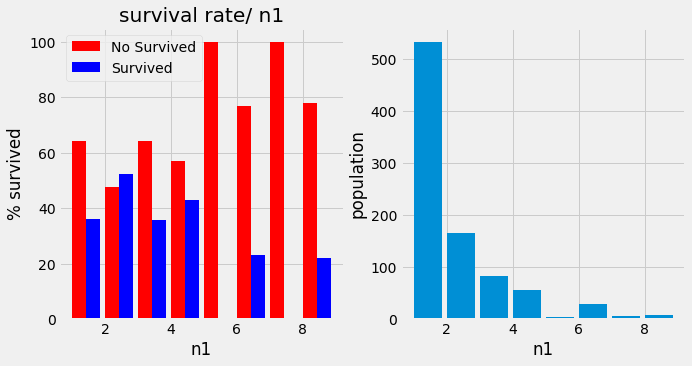

In [38]:
# survived = f(n1)
histogram_survived(data_train, "n1", bins=np.arange(data_train["n1"].min(), data_train["n1"].max()+1, 1))

In [39]:
# here, we can conclude nothing due to the unbalanced population

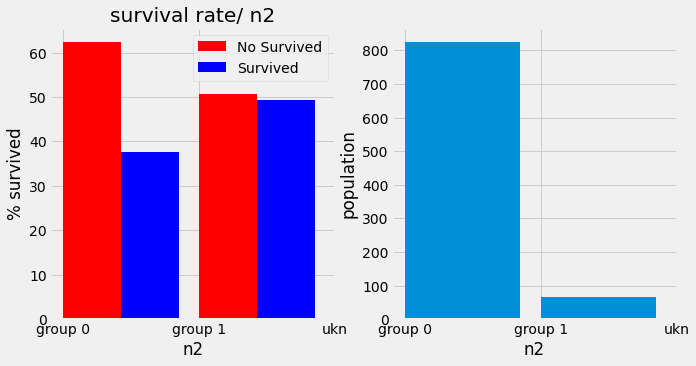

In [40]:
# survived = f(n2)
histogram_survived(data_train, "n2", bins=np.arange(data_train["n2"].min(), data_train["n2"].max()+1, 1),
                   xticks=(list(attr_to_val['n2'].values()), 
                           list(attr_to_val['n2'].keys())))

In [41]:
# it is difficult to conclude something, 2/3 of people of group 0 did not survive, and the ratio is
# 50% for group 1. However, the size of group 1 is too small to conclude something 

          Survived
Survived  1.000000
Pclass   -0.338481
Sex       0.543351
Age      -0.069809
SibSp    -0.035322
Parch     0.081629
Fare      0.257307
Embarked -0.163517
hasCabin  0.316912


<AxesSubplot:>

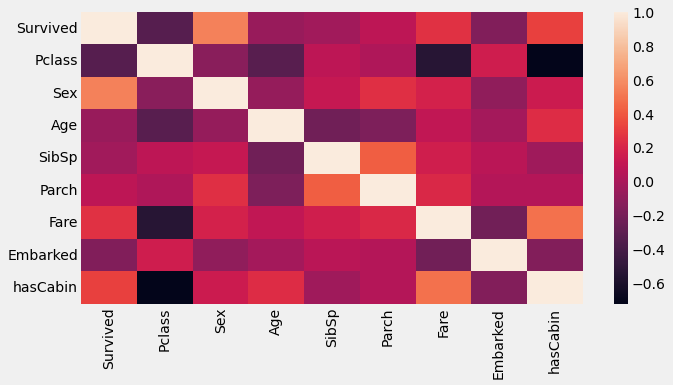

In [42]:
# correlation matrix 
corr = data_train[['Survived', 'Pclass', 'Sex','Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'hasCabin']].corr()

print(corr[['Survived']])
# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [43]:
# we plot the correlation matrix. We can observe that the most correlated parameter with "survived" 
# is the "sex" and after th" "Fare" and "hasCabin" 

In [61]:
(list(attr_to_val['Sex'].values()), 
                           list(attr_to_val['Sex'].keys()))

([0, 1], ['male', 'female'])

In [60]:
attr_to_val.keys()

dict_keys(['Pclass', 'hasCabin', 'Sex', 'Embarked', 'n2'])

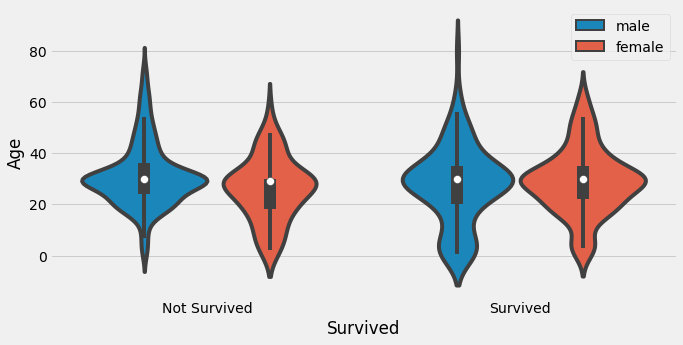

In [68]:
# violin ?
ax = sns.violinplot(x="Survived", y="Age", hue="Sex", kind="swarm", data=data_train)
ax.set_xticklabels(['Not Survived', 'Survived'])
ax.legend(handles=ax.legend_.legendHandles, labels=list(attr_to_val['Sex'].keys()))

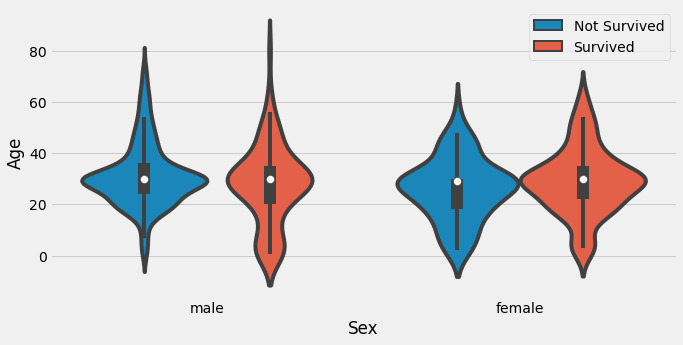

In [69]:
# violin ?
ax=sns.violinplot(x="Sex", y="Age", hue="Survived", kind="swarm", data=data_train)
ax.set_xticklabels(list(attr_to_val['Sex'].keys()))
ax.legend(handles=ax.legend_.legendHandles, labels=['Not Survived', 'Survived'])

In [46]:
data_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'hasCabin', 'n1', 'n2'],
      dtype='object')

In [47]:
data_train_red = reduction(data_train)

In [48]:
data_train_red.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,hasCabin,n1,n2
0,0,3,0,22.0,1,0,7.2500,2,0,2,0
1,1,1,1,38.0,1,0,71.2833,0,1,1,0
2,1,3,1,26.0,0,0,7.9250,2,0,1,0
3,1,1,1,35.0,1,0,53.1000,2,1,2,0
4,0,3,0,35.0,0,0,8.0500,2,0,2,0


In [49]:
infos = [['column', 'nan?']]
for at in data_train_red.columns:
    nb = data_train_red[["Age"]].isnull().sum()
    infos += [[at, bool(nb[0]>0)]]
tabulate.tabulate(infos, tablefmt='html', headers='firstrow')

column,nan?
Survived,False
Pclass,False
Sex,False
Age,False
SibSp,False
Parch,False
Fare,False
Embarked,False
hasCabin,False
n1,False


In [50]:
def normalization(df):
    hist_norm = {}
    for at in df.columns:
        m = df[at].min()
        M = df[at].max()
        hist_norm[at] = (m, M)
    dfn = (df - df.min()) / (df.max() - df.min())
    return dfn, hist_norm

In [51]:
data_train_norm, hist_norm = normalization(data_train_red)
data_train_norm.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,hasCabin,n1,n2
0,0.0,1.0,0.0,0.271174,0.125,0.0,0.014151,0.666667,0.0,0.125,0.0
1,1.0,0.0,1.0,0.472229,0.125,0.0,0.139136,0.000000,1.0,0.000,0.0
2,1.0,1.0,1.0,0.321438,0.000,0.0,0.015469,0.666667,0.0,0.000,0.0
3,1.0,0.0,1.0,0.434531,0.125,0.0,0.103644,0.666667,1.0,0.125,0.0
4,0.0,1.0,0.0,0.434531,0.000,0.0,0.015713,0.666667,0.0,0.125,0.0


In [52]:
print(hist_norm)

{'Survived': (0, 1), 'Pclass': (1, 3), 'Sex': (0, 1), 'Age': (0.42, 80.0), 'SibSp': (0, 8), 'Parch': (0, 6), 'Fare': (0.0, 512.3292), 'Embarked': (0, 3), 'hasCabin': (0, 1), 'n1': (1, 9), 'n2': (0, 2)}
